<img width="800px" heigh="400px" src="logo.png"></img>

# <!-- AUTHOR --> - AUTHOR : __Dr. Amiehe-Essomba__
# <!-- TITLE --> - TITLE : How building a simple Linear Regression model in Python  -

## Objectives :
 - We are going to create a simple __Linear Regression__ model, for that we are going to used 
 the __MSE__ as function to evaluate the cost function 
 
## Equations : 
  The equation of linear model can be difined as 
  
 ```python
    Y = A * X + b
```

  Where :

  * Y : 
  * A : is the slope
  * b : is the bias (explicative values)
  * X : a matrix of dimension (n, m) that contains the features

The MSE equation is :

```python
MSE = (1 / m) * ( (Y - Yhat) ** 2 ).sum( axis = 1)
```

  Where : 

  * m is the number of points 
  * Yhat is the predicted value
  * Y is the True value( target value )

The COST function 

```python
cost = (1 / 2 * m) * ( (Y - Yhat) ** 2 ).sum( axis = 1)
```

## Derivatives 

```ruby
dA = (dcost / dA) 
   = (1 / m) * X.T * (Y - Yhat).sum()

db = (dcos / db)
   = (1 / m) * (Y - Yhat).sum()
```

## Back propagation equations : 
```ruby
A = A - learning_rate + dA
b = b - learning_rate + db
```

## Metrics : 
```python
R = 1 - [ ((Y - Yhat) ** 2).sum(axis=1) / ((Y - Y.mean(axis=1)) ** 2).sum(axis=1) ]
```
more R is closed to 1 better is the model 

## Turning hyperparameters :
* learning_rate = 0.01
* number of points
* max_iter = 5000 for iterations to reach to the convergence of until the 
* epsilon = 1e-4 for convergence
  the gradient becomes smaller (dgrad < epsilon) where epsilon is the tolerence
  in this case we'll use while loop to be sure that we reach to the convergence (local minimum is found)

* shape = X.shape = (n, m)

## Initialization :
```python
params = {'b' : np.zeros((NL, 1)), 'W' : np.zeros((1, n)) }
```

Then after initaliazing parameters we can compute the rest of functions

```python
index, costs = 0, []
while d_epsilon > epsilon:
    A, b    = params["A"].dot(X) + params['b']
    cost    =  (1 / 2 * m) * ( (Y - Yhat) ** 2 ).sum( axis = 1)
    costs.append(cost)
    # back propagation 
    params['A'] = params['A'] - learning_rate * dA
    params['b'] = params['b'] - learning_rate * db

    if index == 0: pass 
    else:
        d_epsilon = costs[index] - costs[index-1]

    index += 1
```

## What we will do here :

 - Creating a new dataset using numpy 
 - Data preprocessing( **cleaning, normalization**)
 - Building first linear model 
 - Train model
 - Test model
 - Computing metrics for evaluating models 
 

In [187]:
import numpy as np
from sklearn.datasets import make_classification , make_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mm

In [77]:
def Model(X : np.ndarray, params : dict = {}):
    """ 
    Y = A.X + b
    Note that :
    A.dim() = [1, n]
    X.dim() = [n, m]
    b.dim() = [1, ]

    """
    model = params['A'].dot(X) + params['b']
    return model.reshape((-1, 1))


In [4]:
def Params(n: int = 1):
    """ 
    params = (A, b)
    A = slope 
    b = bias
    """
    # random normal for both values 
    A = np.random.randn(1, n)
    b = np.random.randn(1,1).reshape((-1,))

    return {"A" : A, "b" : b} 



In [5]:
def COST(X : np.ndarray, y : np.ndarray, params : dict = {}):
    """
    COST using here is the MSE (Mean-Squared-Error)
    """ 
    cost = ( (Model(X=X, params=params) - y) ** 2 ).mean() / 2.0

    return  cost

In [6]:
def Metrics(X : np.ndarray, y : np.ndarray, params : dict = {}):
    """
    Determination coefficient R
    """
    upper   = ( (Model(X=X, params=params ) - y) ** 2 ).sum()
    lower   = ( (y - np.mean(y)) ** 2 ).sum()

    R       = 1 - (upper / lower)
    model_eval   = "GOOD" if R > 0.7 else 'WORSE'

    return R#, model_eval


In [7]:
def back_propagation(X : np.ndarray, y : np.ndarray, params : dict = {}):
    grads = {'dA' : None, 'db' : None}
    """
    note that X.dum() = [n, m] with n = 1 number of feature, m is the samples size 
    X.T.dim() = [n 1] and the result of Model() if [m, 1] that why the summation is on axis = 0 because 
    the final matrix in [m, 1]

    we can see that in the case of db the summation is on axis=1 because the form of matrix does not change [1, m]
    """
    grads['dA'] = ( X.dot( Model(X=X, params=params) -y )).mean(axis=0)
    grads['db'] = ( Model(X=X, params=params) -y ).mean(axis=0)

    return grads

In [8]:
def SGD(X : np.ndarray, y : np.ndarray, params : dict = {}, 
        learning_rate : float = 1e-4, epsilon = 1e-3, print_val : bool=False ):

    cost_history, eval, iter = [], [], 0
 
    while True:
        grads = back_propagation(X = X, y =y, params = params)
        params['A'] = params['A'] - learning_rate * grads['dA']
        params['b'] = params['b'] - learning_rate * grads['db']
        cost        =  COST(X=X, y=y, params=params)
        cost_history.append( cost)

        eval.append( Metrics(X=X, y=y, params=params) )

        if iter < 5 : pass 
        else:
            if np.abs( cost_history[iter] - cost_history[iter-1] ) <= epsilon : break
            else: pass

        if print_val is True:
            if iter % 10 == 0:
                if cost not in [np.nan]:
                        print(f"cost function : {cost} : interation : {iter} ")
                else: break
            else: pass 
        else: pass 
        
        iter += 1

    cost_history = np.array(cost_history)
    eval = np.array(eval)

    return params , cost_history.reshape((-1, 1))[:iter, : ], eval.reshape((-1, 1))[:iter, : ], iter

In [271]:
n_features = 1
# generating samples
X, y    = make_regression(n_samples=500, n_features=n_features, noise=10, random_state=10)
# reshape dimensions
X       = X.reshape((n_features, -1))
y       = y.reshape((-1, 1))

# initialization 
params  = Params(n_features)

# training and evaluating  the model
params , cost_history, eval, iter= SGD(X=X, y=y, params=params, learning_rate=1e-4, print_val=True, epsilon=1e-2)

# metrics compute
cost_history, eval = cost_history.reshape((-1,)), eval.reshape((-1,))

# prediction 

yhat = Model(X=X, params=params).reshape((-1, ))

cost function : 1808.3937500893355 : interation : 0 
cost function : 752.4280609715819 : interation : 10 
cost function : 329.77324215299836 : interation : 20 
cost function : 160.60348472621897 : interation : 30 
cost function : 92.89207863598975 : interation : 40 
cost function : 65.78976080239678 : interation : 50 
cost function : 54.94138457896644 : interation : 60 
cost function : 50.598710821448556 : interation : 70 
cost function : 48.85997010812389 : interation : 80 
cost function : 48.163464535580964 : interation : 90 
cost function : 47.88411863594538 : interation : 100 


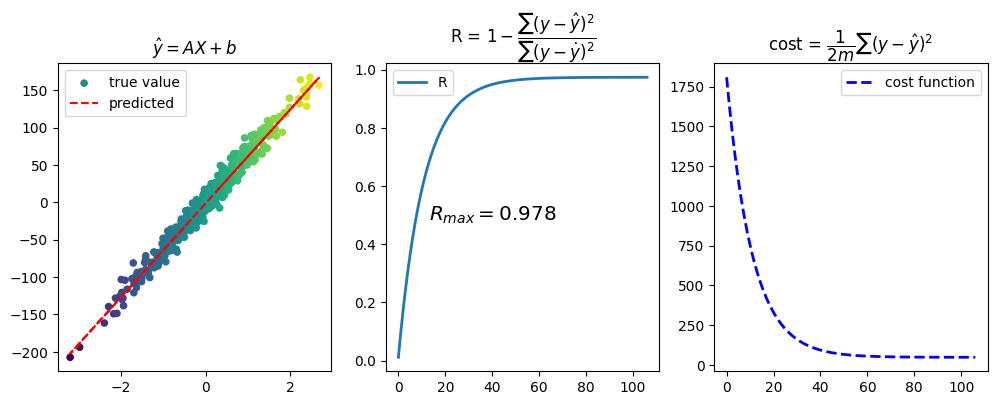

In [272]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
ax1, ax2, ax3 = axes.ravel()


ax1.scatter(X[0], y.reshape((-1,)), marker='o', c=yhat, s=20, label = "true value")
ax1.plot(X[0], yhat, ls='--', color='r', label='predicted')
ax2.plot(eval, lw=2, label='R')
ax3.plot(cost_history, ls="--", lw=2, color='b', label='cost function')
ax2.set_title("R = $1-\dfrac{{\sum (y-\hat{y})^2}}{\sum (y-\dot{y})^2}$")
ax3.set_title("cost = $\dfrac{1}{2m}\sum (y - \hat{y})^2$")
ax1.set_title('$\hat{y} = A X + b$')
ax2.legend()
ax3.legend()
ax2.text(40, 0.5, ha='center', va="center", s='$R_{max} = 0.978} $', fontsize='x-large')
ax1.legend()
